In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline

In [2]:
# Optional parameter for rewriting saved figures
save_figs = True

In [3]:
MICU_admits_clean = pd.read_csv('MICU_admits_clean.csv')

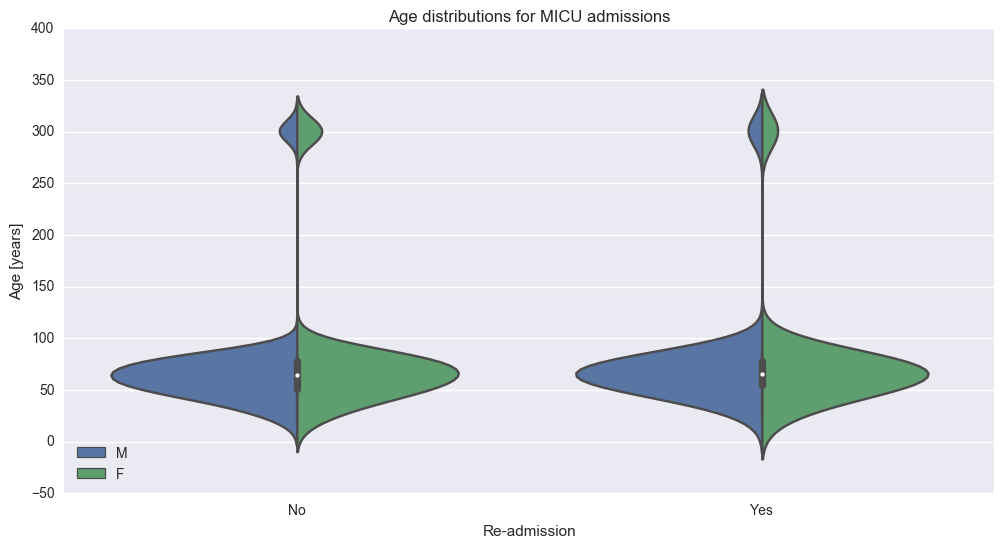

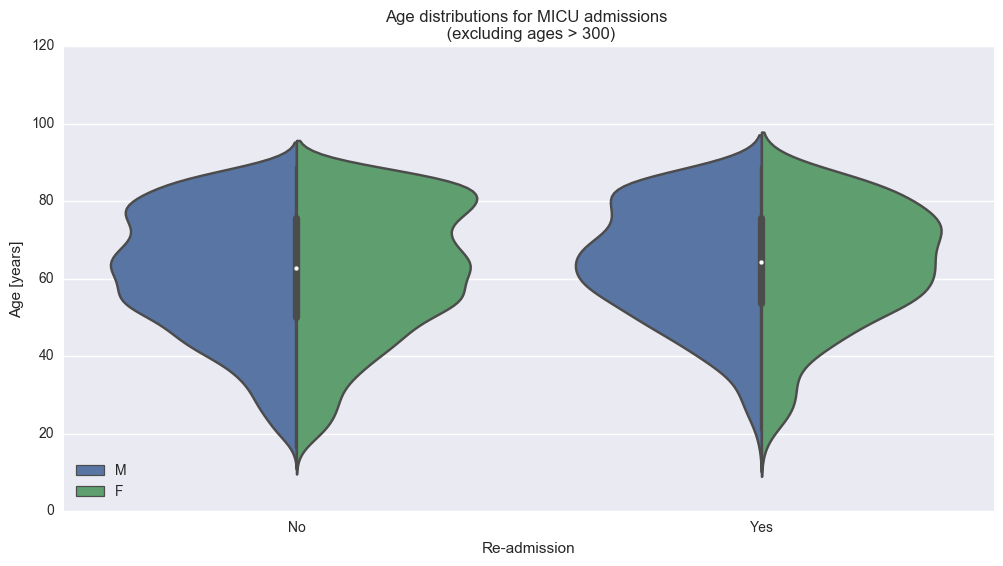

In [4]:
fig = plt.figure(figsize=(12,6))

ax = sns.violinplot(x="future_readmit", hue="gender", y="age",data=MICU_admits_clean, split=True)
plt.legend(loc='lower left')
plt.xlabel('Re-admission')
plt.ylabel('Age [years]')
plt.title('Age distributions for MICU admissions')
if save_figs:
    fig.savefig('figures/Age_distribution_all.png')

fig = plt.figure(figsize=(12,6))
ax = sns.violinplot(x="future_readmit", hue="gender", y="age",data=MICU_admits_clean[MICU_admits_clean.age<300], split=True)
plt.legend(loc='lower left')
plt.xlabel('Re-admission')
plt.ylabel('Age [years]')
plt.title('Age distributions for MICU admissions \n (excluding ages > 300)')
if save_figs:
    fig.savefig('figures/Age_distribution_under300.png')

In [5]:
MICU_single_admit = MICU_admits_clean.loc[MICU_admits_clean.future_readmit == 'No']
MICU_readmit = MICU_admits_clean.loc[MICU_admits_clean.future_readmit == 'Yes']

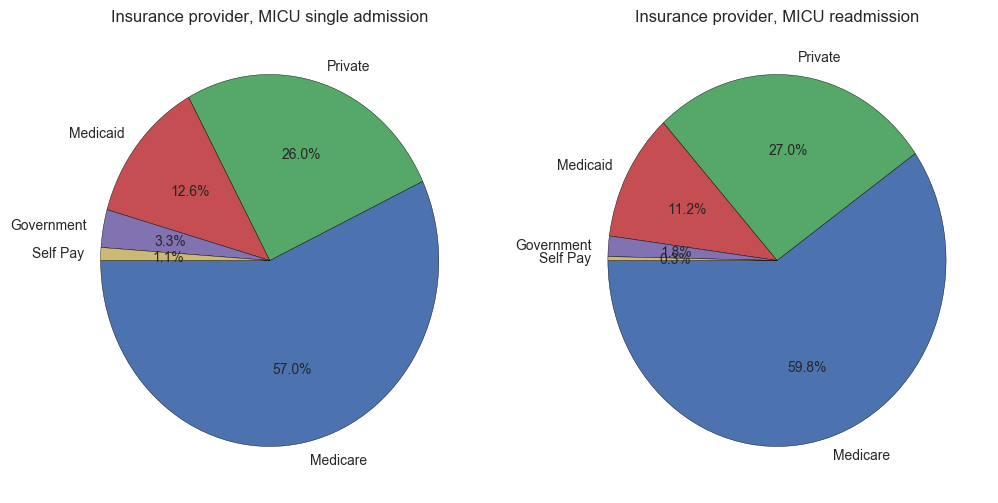

In [6]:
fig = plt.figure(figsize=(12,6))

plt.subplot(121)
MICU_single_admit.insurance.value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle = 180
    
)
plt.title('Insurance provider, MICU single admission')
plt.ylabel('')

plt.subplot(122)
MICU_readmit.insurance.value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle = 180
)
plt.title('Insurance provider, MICU readmission')
plt.ylabel('')

if save_figs:
    fig.savefig('figures/insurance.png')

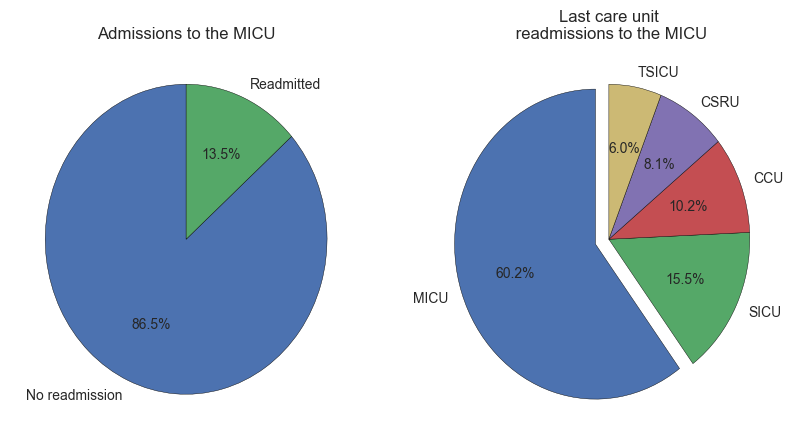

In [7]:
fig = plt.figure(figsize = (10, 5))
plt.subplot(121)
MICU_admits_clean.future_readmit.value_counts().plot.pie(
    labels = ['No readmission', 'Readmitted'],
    startangle = 90,
    autopct='%1.1f%%'
)
plt.ylabel('')
plt.title('Admissions to the MICU')

plt.subplot(122)
MICU_admits_clean.readmit_last_careunit.value_counts().plot.pie(
    labels = MICU_admits_clean.readmit_last_careunit.value_counts().keys(),
    startangle = 90,
    autopct='%1.1f%%',
    explode = (0.1, 0, 0, 0, 0)
)
plt.title('Last care unit\n readmissions to the MICU')
plt.ylabel('')

if save_figs:
    fig.savefig('figures/MICU_readmit.png')

In [8]:
data = MICU_admits_clean

In [9]:
data.shape

(8791, 46)

In [10]:
print 'Number of unique patient ids: {}'.format(len(data.subject_id.unique()))

Number of unique patient ids: 7632


In [11]:
data.loc[data.age<300].age.describe().ix[['mean', 'std']]

mean    61.777887
std     16.565583
Name: age, dtype: float64

In [12]:
data.age.describe().ix[['mean', 'std']]

mean    76.853839
std     60.253135
Name: age, dtype: float64

In [13]:
data.sapsii.describe().ix[['mean', 'std']]

mean    36.384939
std     13.160069
Name: sapsii, dtype: float64

In [14]:
data.sofa.describe().ix[['mean', 'std']]

mean    4.519736
std     2.952146
Name: sofa, dtype: float64

In [15]:
data[['urea_n_min','urea_n_mean','urea_n_max',]].describe().ix[['mean', 'std']]

,urea_n_min,urea_n_mean,urea_n_max
mean,15.907064,26.687386,41.090206
std,14.039126,19.904925,30.825059


In [16]:
data[['platelets_min','platelets_mean','platelets_max',]].describe().ix[['mean', 'std']]

,platelets_min,platelets_mean,platelets_max
mean,172.492606,241.963228,341.113411
std,103.099939,126.831066,187.700887


In [17]:
data[['magnesium_max','albumin_min','calcium_min']].describe().ix[['mean', 'std']]

,magnesium_max,albumin_min,calcium_min
mean,2.428654,2.920828,7.539813
std,1.035810,0.686906,0.857524


In [18]:
data[['resprate_min','resprate_mean','resprate_max']].describe().ix[['mean', 'std']]

,resprate_min,resprate_mean,resprate_max
mean,11.060563,19.737190,31.781822
std,3.819667,3.695597,8.607809


In [19]:
data[['glucose_min','glucose_mean','glucose_max']].describe().ix[['mean', 'std']]

,glucose_min,glucose_mean,glucose_max
mean,91.03397,137.038215,220.661699
std,29.36630,39.688985,136.598970


In [20]:
data[['hr_min','hr_mean','hr_max']].describe().ix[['mean', 'std']]

,hr_min,hr_mean,hr_max
mean,66.967922,86.574360,115.184757
std,13.794283,13.964193,23.593295


In [21]:
data[['sysbp_min','sysbp_mean','sysbp_max']].describe().ix[['mean', 'std']]

,sysbp_min,sysbp_mean,sysbp_max
mean,86.422149,122.131174,162.509157
std,18.710812,16.091755,28.347793


In [22]:
data[['diasbp_min','diasbp_mean','diasbp_max']].describe().ix[['mean', 'std']]

,diasbp_min,diasbp_mean,diasbp_max
mean,38.571606,62.560637,99.620976
std,12.669126,10.674626,26.693442


In [23]:
data[['temp_min','temp_mean','temp_max']].describe().ix[['mean', 'std']]

,temp_min,temp_mean,temp_max
mean,35.797419,36.826636,37.868759
std,0.746170,0.519698,0.898263


In [28]:
data[['urine_min','urine_mean','urine_max']].describe().ix[['mean', 'std']]

,urine_min,urine_mean,urine_max
mean,35.428222,146.089523,597.455238
std,68.858050,468.154408,5943.662640


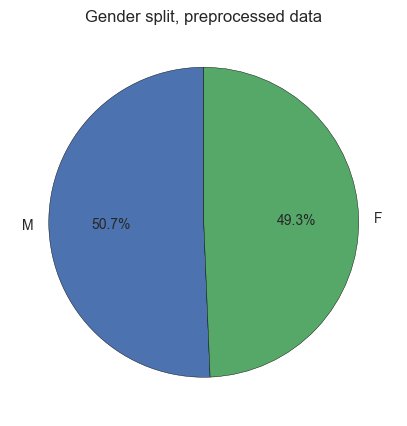

In [24]:
fig = plt.figure(figsize=(5,5))
data.gender.value_counts().plot.pie(startangle = 90, autopct='%1.1f%%')
plt.title('Gender split, preprocessed data')
plt.ylabel('')
fig.savefig('figures/preprocessed_gender.png')

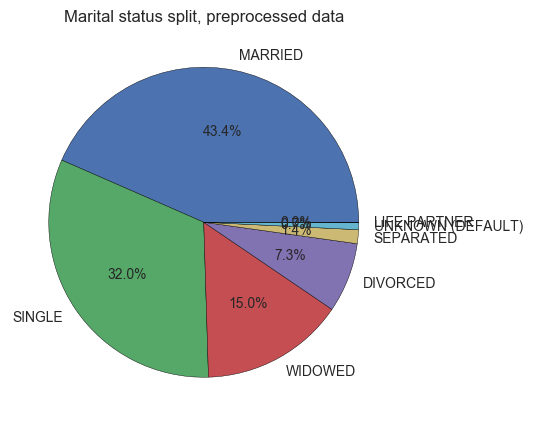

In [25]:
fig = plt.figure(figsize=(5,5))
data.marital_status.value_counts().plot.pie(startangle = 0, autopct='%1.1f%%')
plt.title('Marital status split, preprocessed data')
plt.ylabel('')
fig.savefig('figures/preprocessed_marital.png')

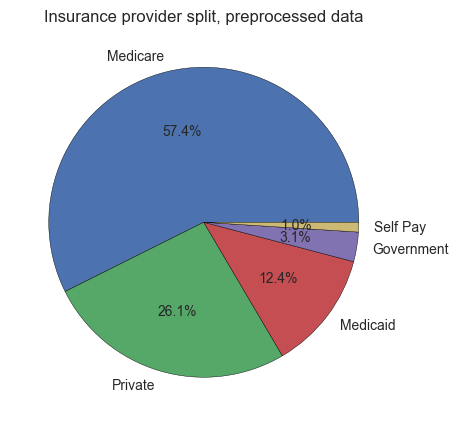

In [26]:
fig = plt.figure(figsize=(5,5))
data.insurance.value_counts().plot.pie(startangle = 0, autopct='%1.1f%%')
plt.title('Insurance provider split, preprocessed data')
plt.ylabel('')
fig.savefig('figures/preprocessed_insurance.png')

In [27]:
import numpy as np
np.sum(data.isnull())

subject_id                  0
hadm_id                     0
admittime                   0
dischtime                   0
first_careunit              0
last_careunit               0
age                         0
gender                      0
marital_status            347
insurance                   0
urea_n_min                  0
urea_n_max                  0
urea_n_mean                 0
platelets_min               0
platelets_max               0
platelets_mean              0
magnesium_max               0
albumin_min                 0
calcium_min                 0
resprate_min                0
resprate_max                0
resprate_mean               0
glucose_min                 0
glucose_max                 0
glucose_mean                0
hr_min                      0
hr_max                      0
hr_mean                     0
sysbp_min                   0
sysbp_max                   0
sysbp_mean                  0
diasbp_min                  0
diasbp_max                  0
diasbp_mea

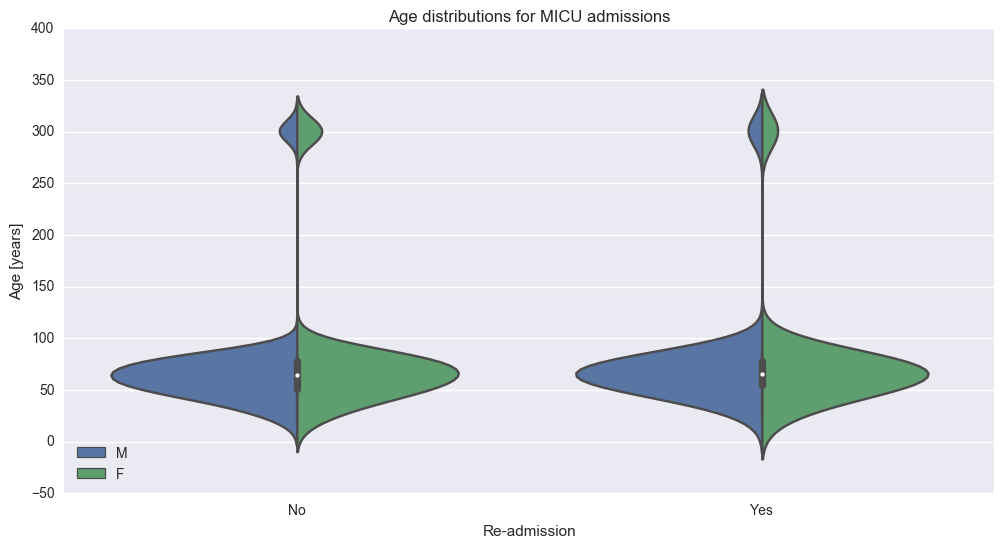

In [37]:
fig = plt.figure(figsize=(12,6))

ax = sns.violinplot(x="future_readmit", hue="gender", y="age", data=MICU_admits_clean, pallete = "muted", split=True)
plt.legend(loc='lower left')
plt.xlabel('Re-admission')
plt.ylabel('Age [years]')
plt.title('Age distributions for MICU admissions')
# if save_figs:
#     fig.savefig('figures/Age_distribution_all.png')

# fig = plt.figure(figsize=(12,6))
# ax = sns.violinplot(x="future_readmit", hue="gender", y="age",data=MICU_admits_clean[MICU_admits_clean.age<300], split=True)
# plt.legend(loc='lower left')
# plt.xlabel('Re-admission')
# plt.ylabel('Age [years]')
# plt.title('Age distributions for MICU admissions \n (excluding ages > 300)')
# # if save_figs:
# #     fig.savefig('figures/Age_distribution_under300.png')